# Homework 2

### by Arman Tsaturyan (DS)

# Question 01


$$
\frac{df}{dx} = 2ax+b
$$
$$
\frac{df}{dx} = 2ax+b = 0 \Rightarrow x = \frac{-b}{2a}
$$

Second derivative:
$$
\frac{d^2f}{dx^2} = 2a
$$

To get the minimum, $a$ must be positive: $a > 0$.

So, for
$a > 0, b \in R \Rightarrow$ The minimum is $x^*=\frac{-b}{2a}$, $f(x^*)=\frac{-b^2}{4a}+c$

# Question 02

$\bigtriangledown h(x) \in R$, 
shape is $(m,1)$.

# Question 03

Using Taylor series:

$
f(x) = f(x^*) + \frac{f'(x^*)}{1!} (x-x^*) + \frac{f''(x^*)}{2!} (x-x^*)^2 + o(||x-x^*||)
$

$
f(x) - f(x^*) = \frac{f'(x^*)}{1!} (x-x^*) + \frac{f''(x^*)}{2!} (x-x^*)^2 + o(||x-x^*||)
$

The point $x^*$ is a minimum, so $f'(x^*)=0$. 

So, and because for strongly convex function there will always be $\mu$ such that $f''(x) \geq \mu \geq 0$:

$$
f(x) - f(x^*) = \frac{f''(x^*)}{2!} (x-x^*)^2 + o(||x-x^*||) \geq \frac{\mu}{2!} ||x-x^*||^2_2
$$

Hense,

$$
f(x) - f(x^*) \geq \frac{\mu}{2} ||x-x^*||^2_2
$$

# Question 04
$f = (x,c)^2$

$\nabla f = 2c_i(x,c)$, where $i$ is the index of gradient vector.

The Hessian matrix $H$ = $2 c_i c_j$, where $i,j$ are the indices of the matrix.

# Question 05
$$\frac{df}{dx_i}=\frac{df}{dg} \frac{dg}{d(Ax+b)} \frac{d(Ax+b)}{dx_i}=A_i \frac{dg}{d(Ax+b)}$$

Hessian matrix:

$$\frac{d^2f}{dx_i dx_j}=A_i \frac{dg}{d(Ax+b)} \frac{d(Ax+b)}{dx_j} = A_i A_j \frac{d^2g}{d(Ax+b)^2}$$

# Question 06

$$
f(\gamma) = (A x + \gamma A d, x + \gamma d) + (b, x + \gamma d)=\\
= x^T A x + \gamma x^T A d + \gamma d^T A x + \gamma^2 d^T A d + b^T x + \gamma b^T d
$$

Derive:
$$
\frac{df(\gamma)}{d\gamma} = x^T A d +  d^T A x + 2 \gamma d^T A d + b^T d = 0
$$

So,
$$
    \gamma = \frac{-b^T d - x^T A d - d^T A d}{2 d^T A d}
$$

# Question 07


$f(x)=[x^2-1]_+$

Subgradient:

* $2x$, if $x <  -1$ and $ x > 1$;
* $0$, if $ x > -1$ and $x < 1$;
* $[0;2]$, if $x = 1$;
* $[-2;0]$, if $x = -1$;

# Question 08


The exact solution is:
$$
f^{\prime}({x})=0
$$
$$
\begin{aligned}
&Q {{x}}-{b}=0\\
&{{x}}=Q^{-1} {b}
\end{aligned}
$$
From definition of steepest descent:
$$
{x}^{{1}}={x}^{{0}}+\alpha\left(Q {x}^{{0}}-{b}\right)
$$



Assume the steepest descent converges in one step, i.e. $x^1$ is the solution.

Then:

$$
0=Q x^{1}-b=Q\left(x^{0}-\alpha\left(Q x^{0}-b\right)\right)-b=(I-\alpha Q)\left(Q x^{0}-b\right)$$


Hence $Q x^{0}-b$ has to be an eigenvector of $Q$, because $x^{0} \neq Q^{-1} b$ 

# Question 09

In [233]:
import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [234]:
def f(x):
    return x[0]**2+x[0]*x[1]+10*x[1]**2-22*x[1]-5*x[0]

def df(x):
    return np.array([2*x[0]+x[1]-5, x[1]+20*x[1]-22])

In [235]:
xx, yy = np.mgrid[-15:15:50j,-10:10:50j]
ff = f(np.array([xx, yy]))

#### Starting at (1,10)

In [246]:
guesses = [np.array([1, 10])]

def f1d(alpha):
    return f(x + alpha*s)

while True:
    x = guesses[-1]
    s = -df(x)
    alpha_opt = sopt.golden(f1d)
    next_guess = x + alpha_opt * s
    guesses.append(next_guess)
    if np.abs(guesses[-1][0]-guesses[-2][0])+np.abs(guesses[-1][1]-guesses[-2][1]) <0.01:
        break

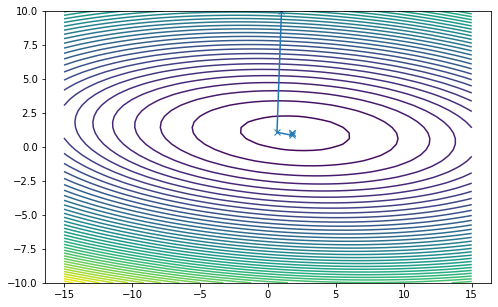

In [248]:
plt.figure(figsize=[8,5])
plt.axis("equal")
plt.contour(xx, yy, ff, 50)
it_array = np.array(guesses)
plt.plot(it_array.T[0], it_array.T[1], "x-")

#### Starting at (10,10)

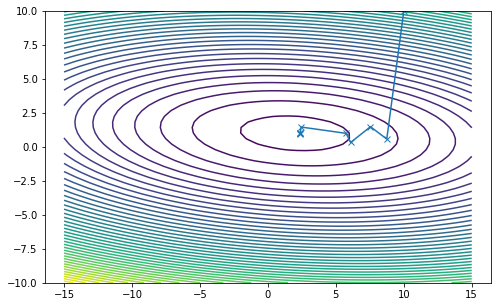

In [249]:
guesses = [np.array([10, 10])]

def f1d(alpha):
    return f(x + alpha*s)

while True:
    x = guesses[-1]
    s = -df(x)
    alpha_opt = sopt.golden(f1d)
    next_guess = x + alpha_opt * s
    guesses.append(next_guess)
    if np.abs(guesses[-1][0]-guesses[-2][0])+np.abs(guesses[-1][1]-guesses[-2][1]) <0.01:
        break
        
plt.figure(figsize=[8,5])
plt.axis("equal")
plt.contour(xx, yy, ff, 50)
it_array = np.array(guesses)
plt.plot(it_array.T[0], it_array.T[1], "x-")

#### Starting at (10,1)

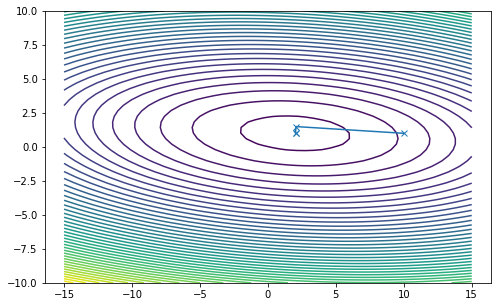

In [251]:
guesses = [np.array([10, 1])]

def f1d(alpha):
    return f(x + alpha*s)

while True:
    x = guesses[-1]
    s = -df(x)
    alpha_opt = sopt.golden(f1d)
    next_guess = x + alpha_opt * s
    guesses.append(next_guess)
    if np.abs(guesses[-1][0]-guesses[-2][0])+np.abs(guesses[-1][1]-guesses[-2][1]) <0.01:
        break
        
plt.figure(figsize=[8,5])
plt.axis("equal")
plt.contour(xx, yy, ff, 50)
it_array = np.array(guesses)
plt.plot(it_array.T[0], it_array.T[1], "x-")

## Results:
The number of steps depend on the starting point. For (10,1) and (1,10) we dinished in 2 steps,but for (10,10) we did 6 steps

# Question 10

In [298]:
def func(x,n):
    sm=0
    for i in range(1,n):
        sm +=(2*x[i-1]**2-x[i]-1)**2
    return(1/4*(x[0]-1)**2+sm)
def dfunc(x,n):
    d=[None]*(n-1)
    d[0] = 1/2*(x[0]-1)+2*(2*x[0]**2-x[1]-1)*4*x[0]
    for i in range(1,n-1):
        d[i]=-2*(2*x[i-1]**2-x[i]-1)+2*(2*x[i]**2-x[i+1]-1)*4*x[i]
        #d[1]=-2*(2*x[1]**2-x[2]-1)+2*(2*x[2]**2-x[3]-1)*4*x[2]
    return(np.array(d))

In [299]:
x0_3 = [-1.5,1,1]
x0_10 = [-1.5,1,1,1,1,1,1,1,1,1]

In [300]:
dfunc(x0_3,3)

array([-31.25,  -5.  ])

In [303]:
guesses = [np.array(x0_3)]

def f1d(alpha):
    return func(x + alpha*s,3)